<a href="https://colab.research.google.com/github/Amit230124/Intro-to-Machine-learning/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question-1 (a)

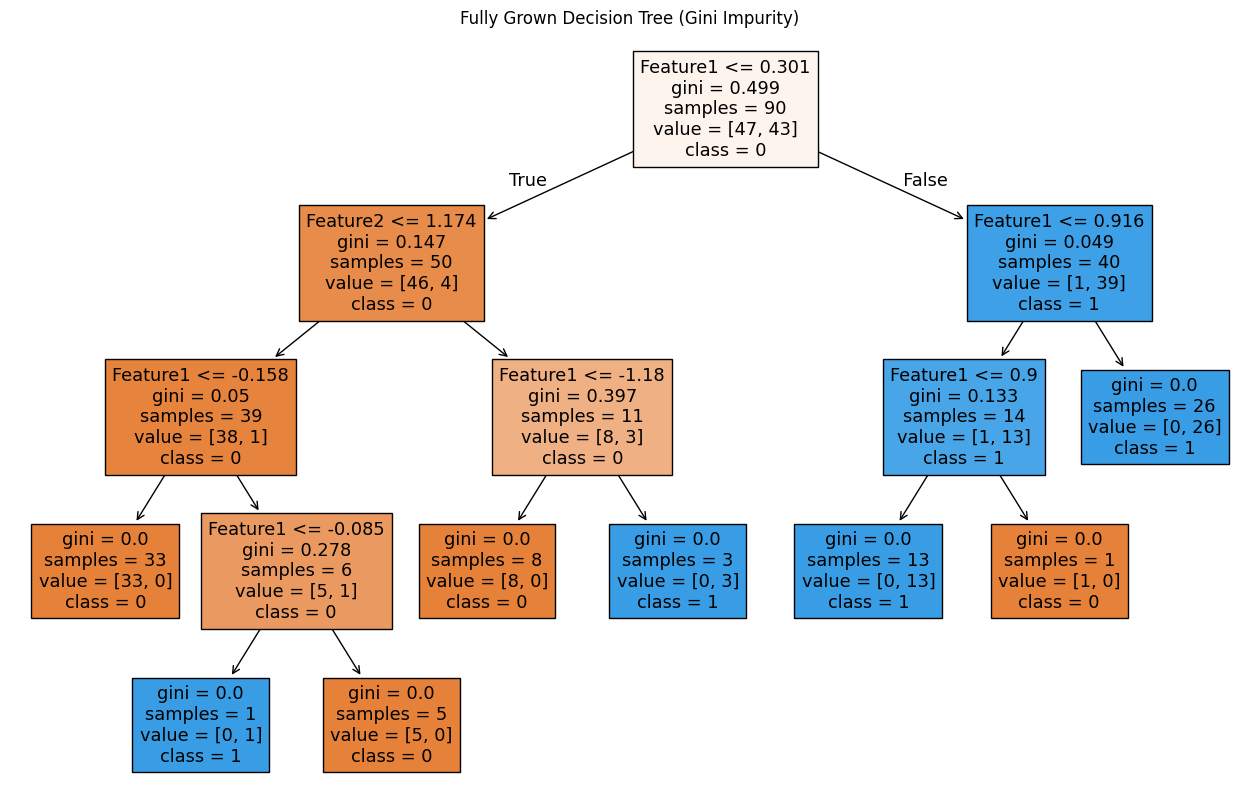

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = pd.read_csv("A4_test.csv")

X = df[["Feature1", "Feature2"]]
y = df["Label"]

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
clf.fit(X, y)

plt.figure(figsize=(16, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.title("Fully Grown Decision Tree (Gini Impurity)")
plt.show()

(b)

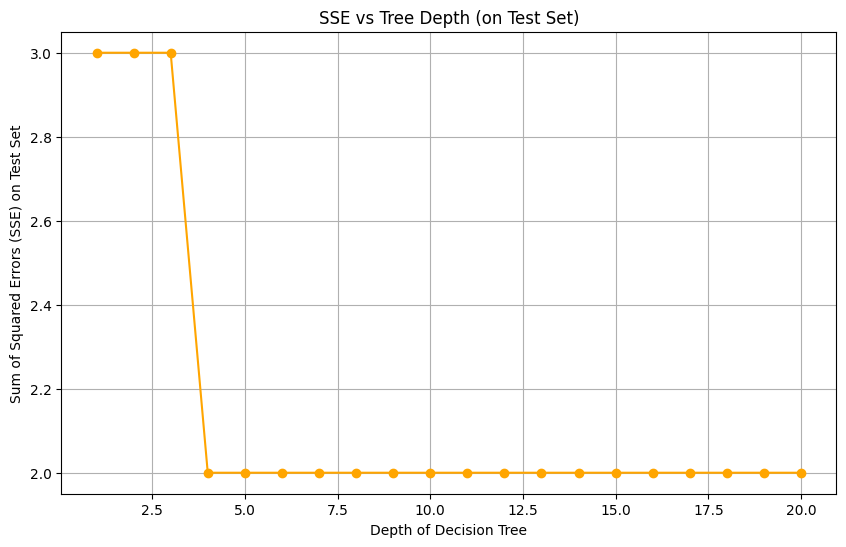

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("A4_test.csv")
X = df[["Feature1", "Feature2"]]
y = df["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth_range = range(1, 21)
test_sse_values = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    sse = np.sum((y_test - y_pred) ** 2)
    test_sse_values.append(sse)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, test_sse_values, marker='o', color='orange')
plt.xlabel("Depth of Decision Tree")
plt.ylabel("Sum of Squared Errors (SSE) on Test Set")
plt.title("SSE vs Tree Depth (on Test Set)")
plt.grid(True)
plt.show()


(c)

In [6]:
delta_sse = np.diff(test_sse_values)

min_delta_index = np.argmin(np.abs(delta_sse)) + 1
optimal_depth = max_depth_range[min_delta_index]
print("Optimal Pruning Depth:", optimal_depth)

Optimal Pruning Depth: 2


(d)

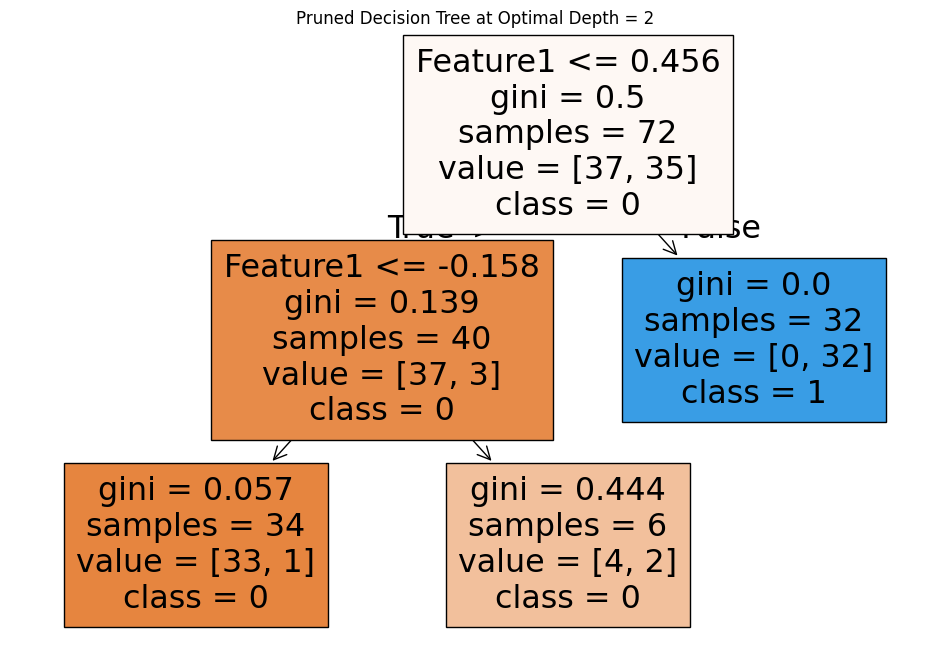

In [8]:
clf_pruned = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=0)
clf_pruned.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf_pruned, filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.title(f"Pruned Decision Tree at Optimal Depth = {optimal_depth}")
plt.show()

Question-2

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("A2_P2.csv")

X = df[["Feature 1", "Feature 2"]]
y = df["Output"]

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on Test Set:", mse)

Mean Squared Error (MSE) on Test Set: 0.11569326725071945
